# Author: Basilio Cieza Huaman
# email: bciezah@gmail.com

# 1. Importing libraries

In [1]:
from __future__ import division
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math
import numpy as np
import os
import re
import scipy.integrate
from scipy.constants import N_A
from scipy.integrate import odeint
import h5py
import matplotlib
import math
import numpy as np
import os
import re
from pylab import *
np.seterr(divide='ignore',invalid='ignore')
pass

# 2. Defining functions

In [2]:
# plot styles
def screen_style(fontSize=20):
    global plotStyles,stepStyles,plotColors,plotSymbols
    matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'sans-serif','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
    plotStyles={"markersize":12,"markeredgewidth":3.0,"linewidth":3.0}
    stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
    plotColors=plt.rcParams['axes.prop_cycle'].by_key()['color']
    plotSymbols=['x','o','^']

# solve differential equations    
def solve_dif_eq(y,t,k1,k2,k3,k4):
    dx1  = -2*k1*((1-2*y[1])**2) + 2*k2*y[1] - 2*k3*((1-2*y[1])**2)*(y[1]**2) + 2*k4*(y[1]**3)                     # y[0]
    dx2  = +k1*((1-2*y[1])**2) - k2*y[1] + k3*((1-2*y[1])**2)*(y[1]**2) - k4*(y[1]**3)                     # y[1]          
    return[dx1,dx2]

# Function to calculate entropy production
def EntropyProduction(x1,k1,k2,k3,k4):
    x2=(1-x1)/2
    Jneg1=k2*x2;
    Jpos1=k1*(x1**2)
    Jneg2=k4*(x2**3)
    Jpos2=k3*(x2**2)*(x1**2)
    r1  =(Jneg1-Jpos1)*log(Jneg1/Jpos1)
    r2  =(Jpos2-Jneg2)*log(Jpos2/Jneg2) 
    Et=r1+r2       
    return[Et]

# Function to calculate chemical potential
def ChemicalPotential(k1,k2,k3,k4):   
    return[log((k2* k3)/(k1*k4))]

In [3]:
screen_style() # calling plot styles functions

# 3. Bifurcation Analysis

####  3.1 First interval

In [4]:
fsss0=[] # first stable steady state
k3_axis0=[]
k1=k4=0.1 ;k2=100
x1=linspace(0,1.5,100000)
y0=x1*0
k3sample2=logspace(2,4,1000)[0:570]
for k3 in k3sample2:  
    dx1  = -k1*((x1)**2) + k2*(0.5-0.5*x1) - k3*((x1)**2)*((0.5-0.5*x1)**2) + k4*((0.5-0.5*x1)**3)
    index=np.where(np.logical_and(dx1>=-0.1, dx1<=+0.1))
    index3=np.where(np.logical_and(x1[index]>=0.99, x1[index]<1))
    fsss0.append(x1[index][index3][0])
    k3_axis0.append(k3)

#### 3.2 Second interval

In [5]:
fsss=[] # first stable steady state before 
ssss=[] # second sss
midpoint=[] # unstable steady state
k3_axis=[]
k1=k4=0.1
k2=100 # k2 value for test
x1=linspace(0,1.5,100000) # x1 fraction
y0=x1*0
k3sample1=logspace(3,5,1000)[65:630] 
for k3 in k3sample1:  
    dx1  = -k1*((x1)**2) + k2*(0.5-0.5*x1) - k3*((x1)**2)*((0.5-0.5*x1)**2) + k4*((0.5-0.5*x1)**3)
    index=np.where(np.logical_and(dx1>=-0.01, dx1<=+0.01))
    index2=np.where(np.logical_and(x1[index]>=0.67, x1[index]<0.993))
    midpoint.append(x1[index][index2][0])
    index4=np.where(np.logical_and(x1[index]>=0.993, x1[index]<=1))
    ssss.append(x1[index][index4][0])
    index3=np.where(np.logical_and(x1[index]>=0, x1[index]<0.67))
    fsss.append(x1[index][index3][0])
    k3_axis.append(k3)

#### 3.3 Third interval

In [6]:
fsss2=[] # first stable steady state
k3_axis2=[]
k1=k4=0.1
k2=100
x1=linspace(0,1.5,100000)
y0=x1*0
k3sample2=logspace(3,5,1000)[640:900]
for k3 in k3sample2:  
    dx1  = -k1*((x1)**2) + k2*(0.5-0.5*x1) - k3*((x1)**2)*((0.5-0.5*x1)**2) + k4*((0.5-0.5*x1)**3)
    index=np.where(np.logical_and(dx1>=-0.1, dx1<=+0.1))
    index3=np.where(np.logical_and(x1[index]>=0, x1[index]<0.67))
    fsss2.append(x1[index][index3][0])
    k3_axis2.append(k3)
print("ready")

ready


# 4. Combining and plotting intervals

/home/local/WIN/bciezah1/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


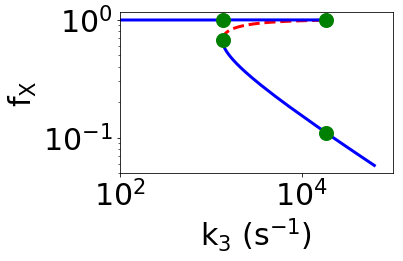

In [7]:
fig, ax = plt.subplots()
ax.plot(k3_axis0,fsss0,'b-',**plotStyles)
ax.plot(k3_axis,midpoint,'r--',**plotStyles)
ax.plot(k3_axis,fsss,'b-',**plotStyles)
ax.plot(k3_axis,ssss,'b-',**plotStyles)
ax.plot(k3_axis2,fsss2,'b-',**plotStyles)
ax.plot(1349.36,0.668,'go',**plotStyles)
ax.plot(1349.36,1,'go',**plotStyles)
ax.plot(18500,1,'go',**plotStyles)
ax.plot(18500,0.1085,'go',**plotStyles)
xlim([1e+2,1e+5])
yscale('log')
xscale('log')
ax.tick_params(axis='both',which='major',labelsize=30)
xlabel('$\mathregular{k_3}$ (s${^{-1}}$)',fontsize=30);ylabel('$\mathregular{f_{X}}$',fontsize=30)
tight_layout()

# 5. END